In [11]:
%matplotlib inline

import pandas as pd
import numpy as np
from dataset import SNPmarkersDataset
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_dataset = SNPmarkersDataset(mode="train")
validation_dataset = SNPmarkersDataset(mode="validation")
test_dataset = SNPmarkersDataset(mode="test")

# Phenotype statistics

In [10]:
train_phenotypes_df = pd.DataFrame.from_dict(train_dataset.phenotypes)
validation_phenotypes_df = pd.DataFrame.from_dict(validation_dataset.phenotypes)
test_phenotypes_df = pd.DataFrame.from_dict(test_dataset.phenotypes)


means = pd.DataFrame([np.mean(train_phenotypes_df, axis = 0), np.mean(validation_phenotypes_df, axis = 0), np.mean(test_phenotypes_df, axis = 0)], index = ["Train", "Validation", "Test"])
print("Means: ")
print(means)
print("\n\n")

print("/////////////////////////////////////////////////////////////////////////////////")
covariance_df = train_phenotypes_df.cov()
print("Covariance matrix for the training dataset: ")
print(covariance_df)
print("---------------------------------------------------------------------------------")

covariance_df = validation_phenotypes_df.cov()
print("Covariance matrix for the validation dataset: ")
print(covariance_df)
print("---------------------------------------------------------------------------------")

covariance_df = test_phenotypes_df.cov()
print("Covariance matrix for the test dataset: ")
print(covariance_df)
print("/////////////////////////////////////////////////////////////////////////////////")
print("\n\n")

correlation_df = train_phenotypes_df.corr()
print("Correlation matrix for the training dataset: ")
print(correlation_df)
print("---------------------------------------------------------------------------------")

correlation_df = validation_phenotypes_df.corr()
print("Correlation matrix for the validation dataset: ")
print(correlation_df)
print("---------------------------------------------------------------------------------")

correlation_df = test_phenotypes_df.corr()
print("Correlation matrix for the test dataset: ")
print(correlation_df)

Means: 
             pheno_1   pheno_2   pheno_3   pheno_4   pheno_5   pheno_6
Train       3.399447  5.106447  3.319052  3.253731 -3.633327  2.869897
Validation  3.482662  5.165595  3.262105  3.193079 -2.773054  2.950615
Test        3.789484  5.678984  3.550566  3.568580 -3.120654  3.050898



/////////////////////////////////////////////////////////////////////////////////
Covariance matrix for the training dataset: 
          pheno_1    pheno_2   pheno_3   pheno_4    pheno_5   pheno_6
pheno_1  4.120512   5.428860  2.036304  2.253311  -3.278040  2.806814
pheno_2  5.428860  14.758584  3.047348  3.662180  -7.095327  5.084772
pheno_3  2.036304   3.047348  2.634132  1.932408  -1.864185  2.154414
pheno_4  2.253311   3.662180  1.932408  2.517830  -2.162567  2.241811
pheno_5 -3.278040  -7.095327 -1.864185 -2.162567  59.005047 -2.920423
pheno_6  2.806814   5.084772  2.154414  2.241811  -2.920423  3.004021
---------------------------------------------------------------------------------
Covari

# Phenotype histogram visualisation

Create box plots and ecdf plots to better visualize and analyse the differents datasets for each phenotype

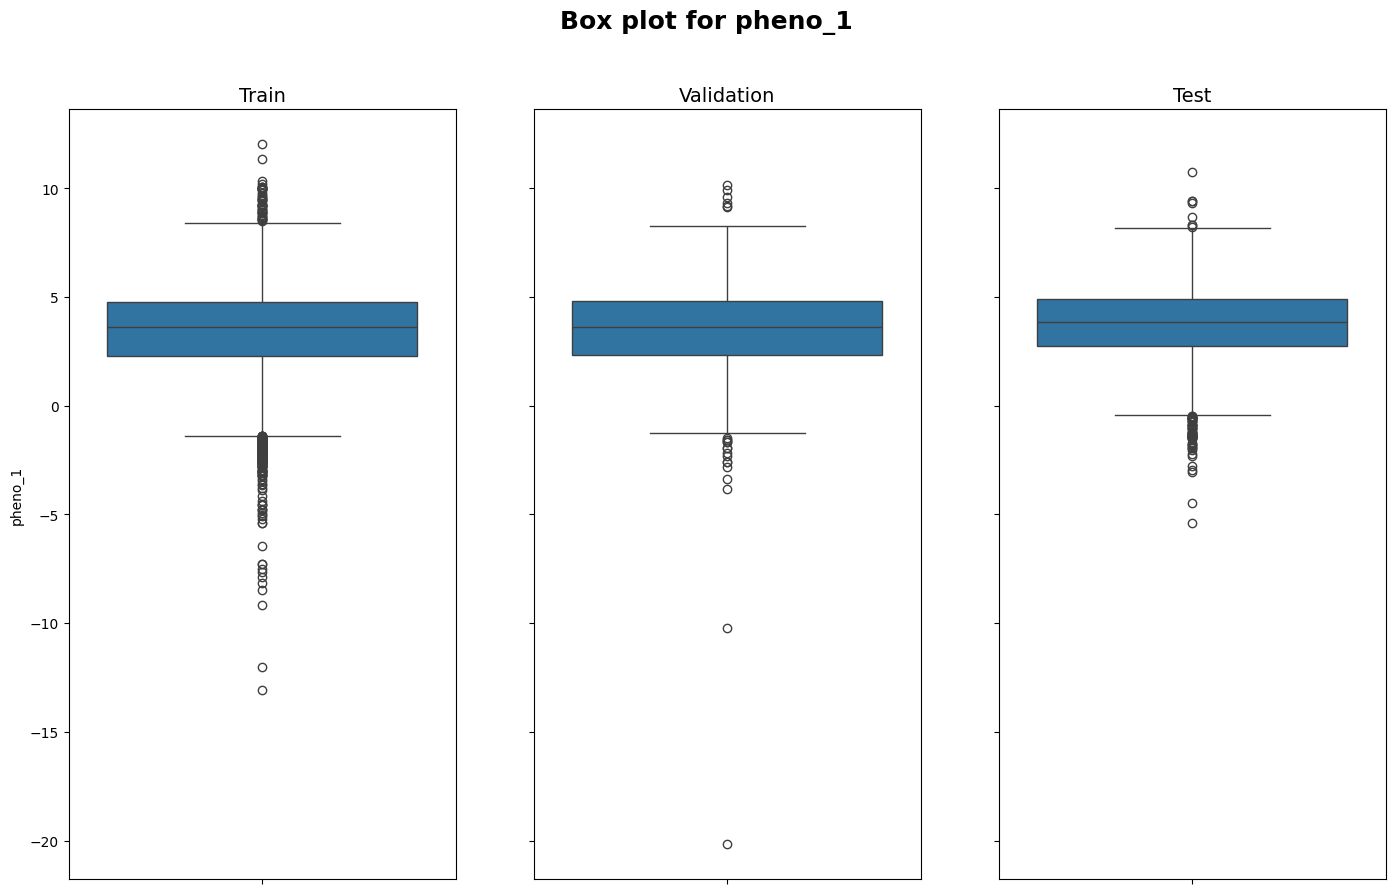

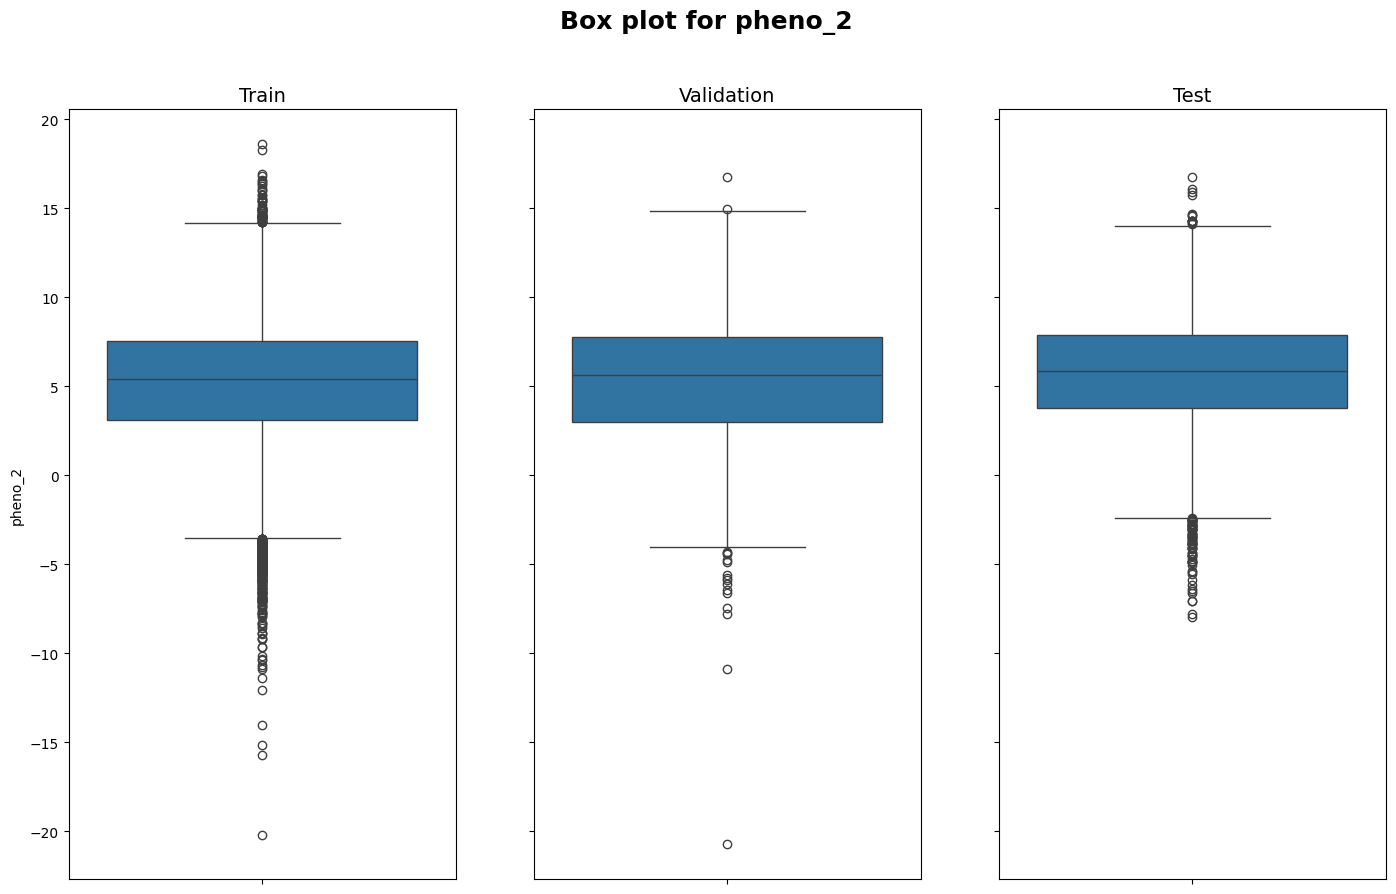

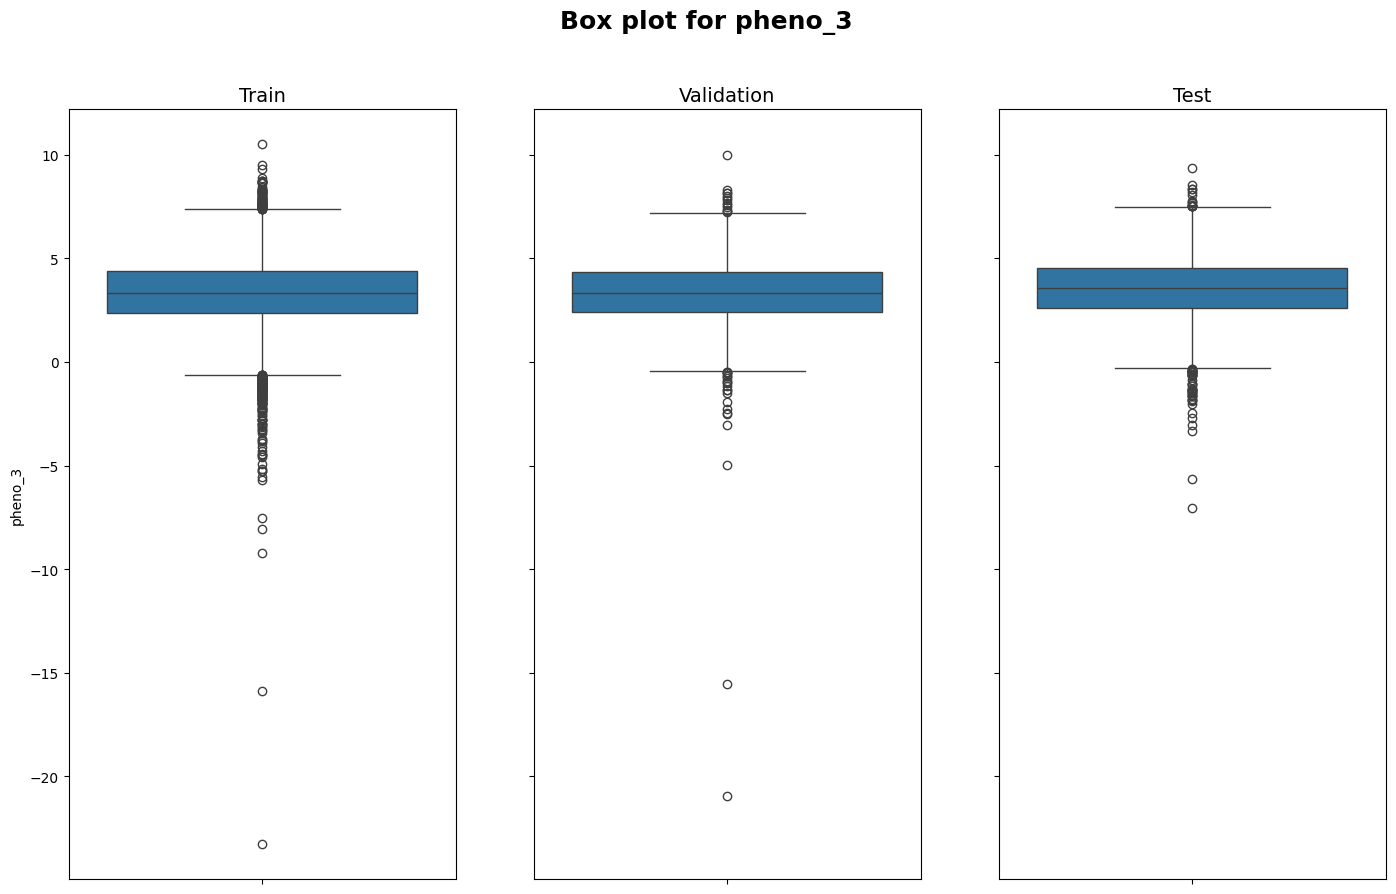

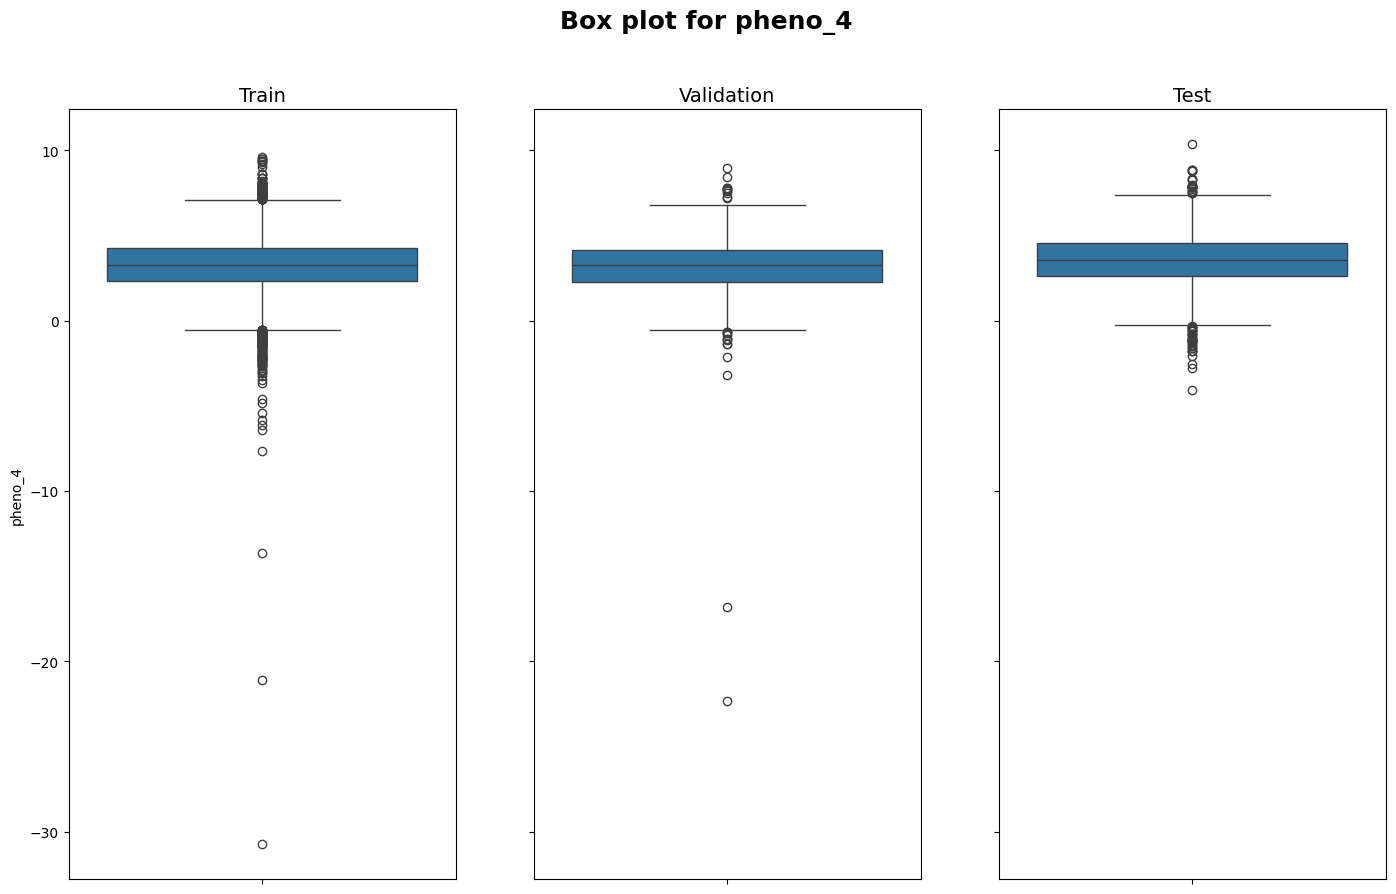

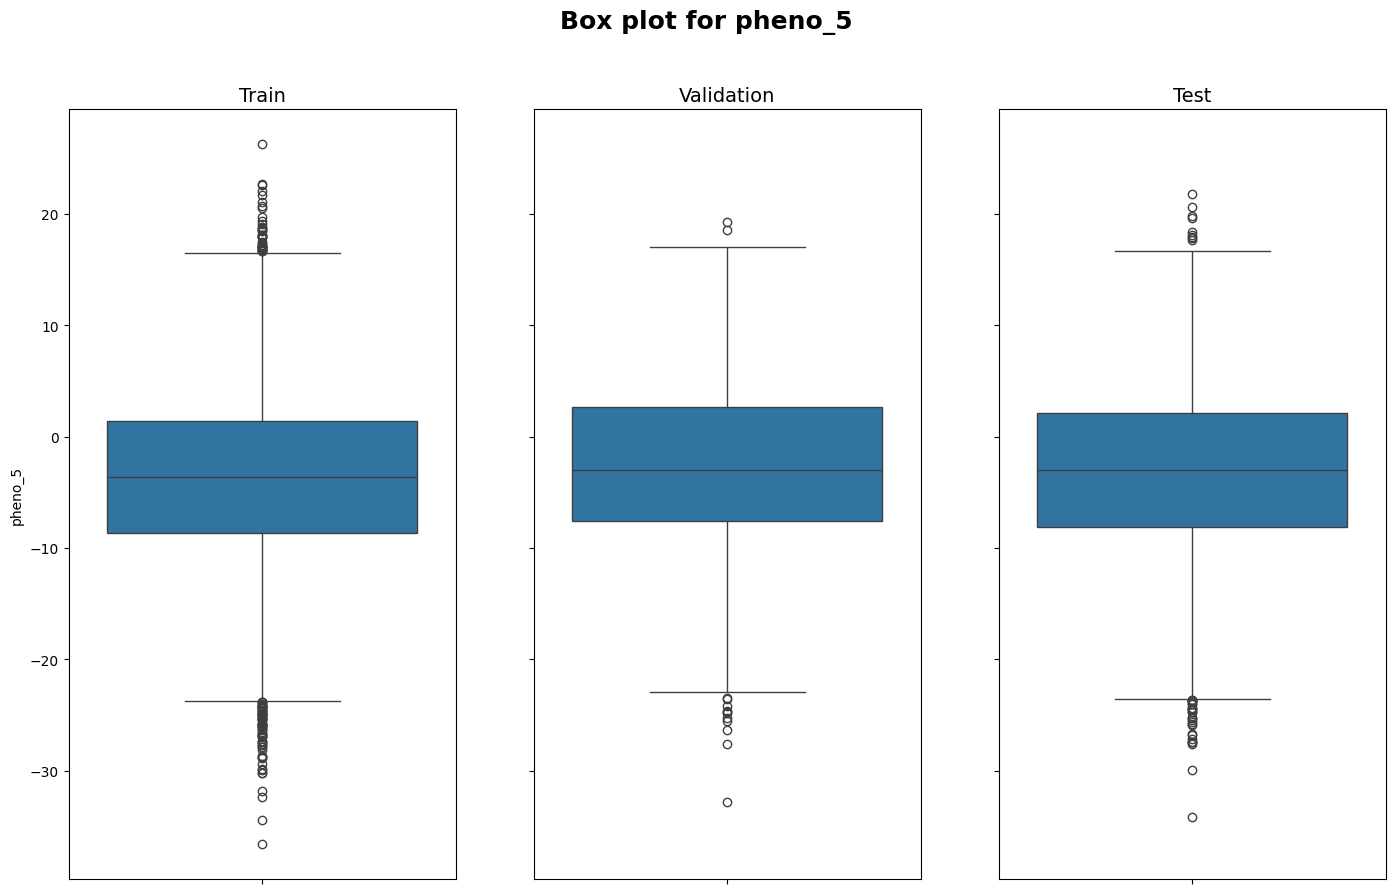

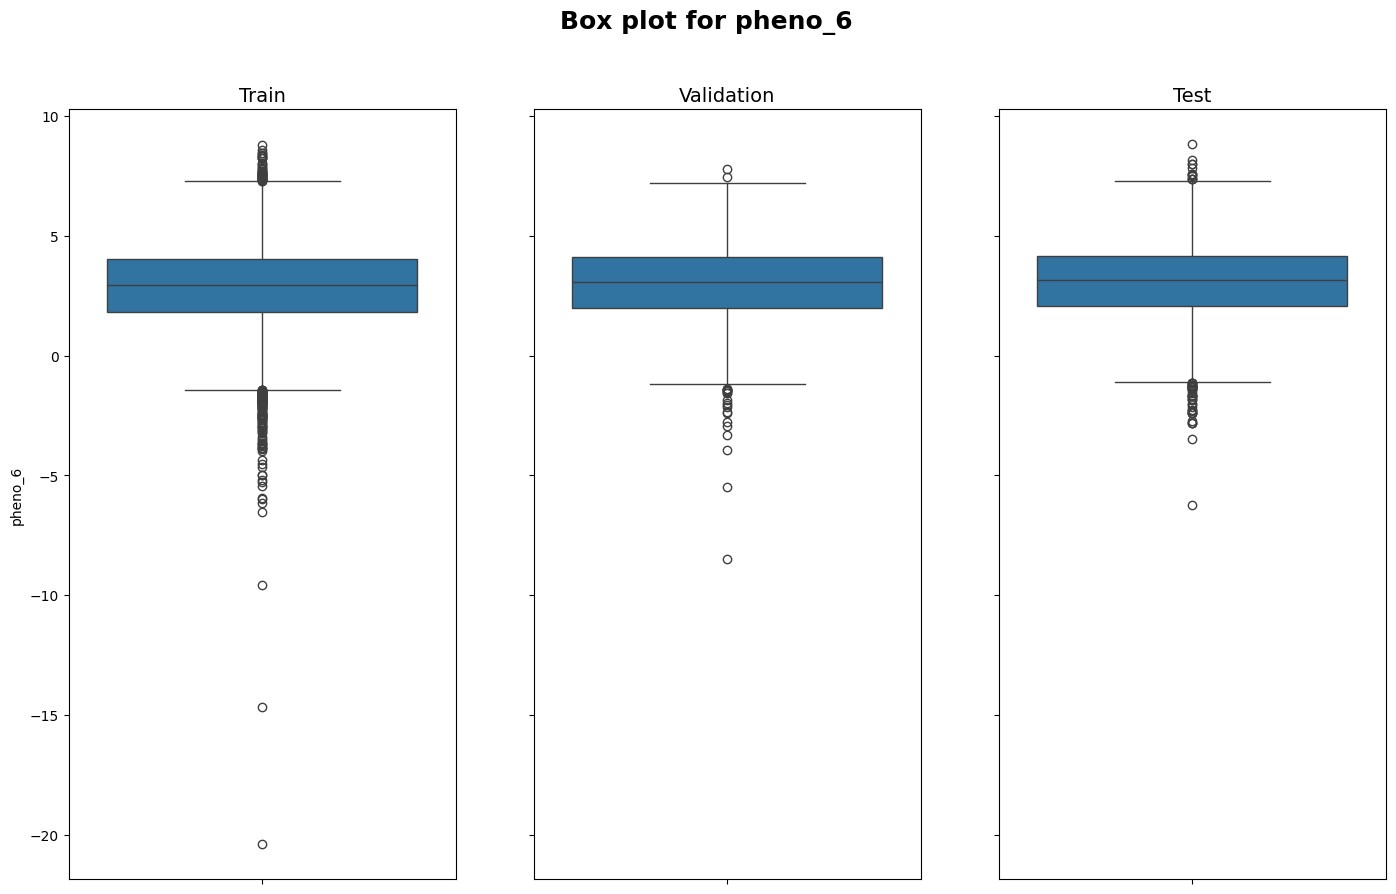

In [108]:
for pheno in train_dataset.phenotypes.keys():
    fig, axs = plt.subplots(1,3, sharey = True, figsize=(17 , 10))
    fig.suptitle(f"Box plot for {pheno}", font={"weight": "bold" ,"size": 18})
    axs[0].set_title("Train", fontsize = 14)
    axs[1].set_title("Validation", fontsize = 14)
    axs[2].set_title("Test", fontsize = 14)
    sns.boxplot(train_phenotypes_df[pheno], ax = axs[0])
    sns.boxplot(validation_phenotypes_df[pheno], ax = axs[1])
    sns.boxplot(test_phenotypes_df[pheno], ax = axs[2])

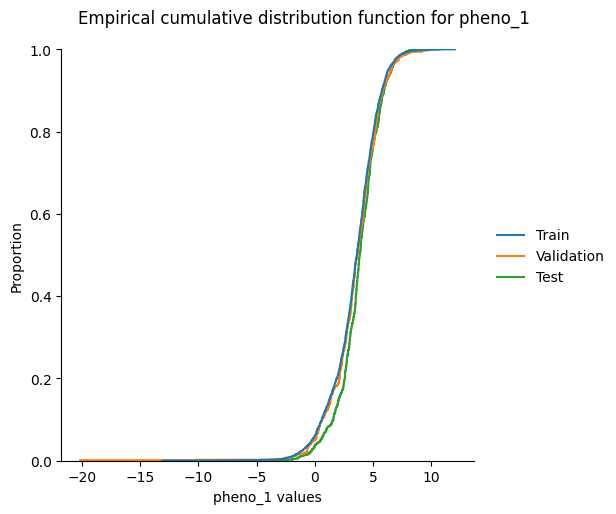

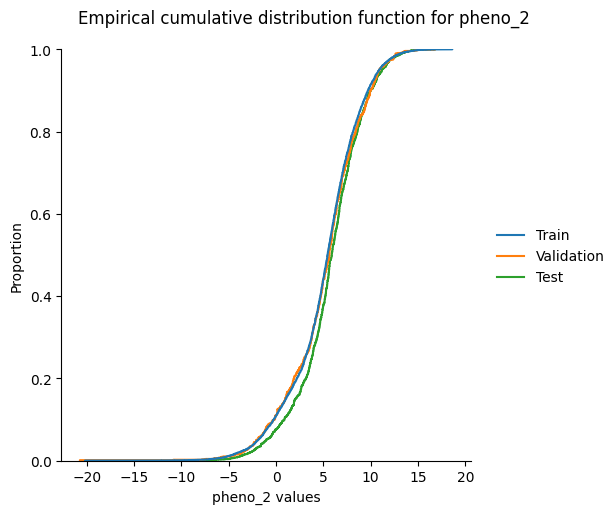

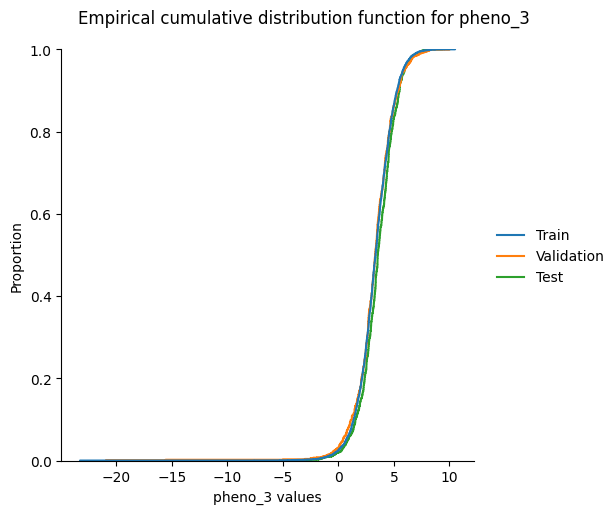

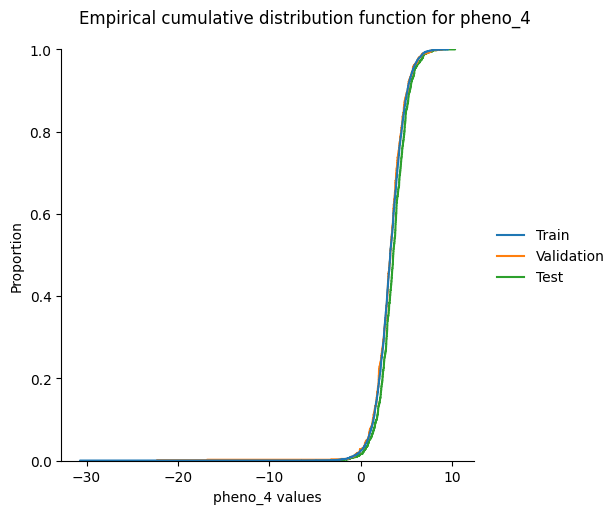

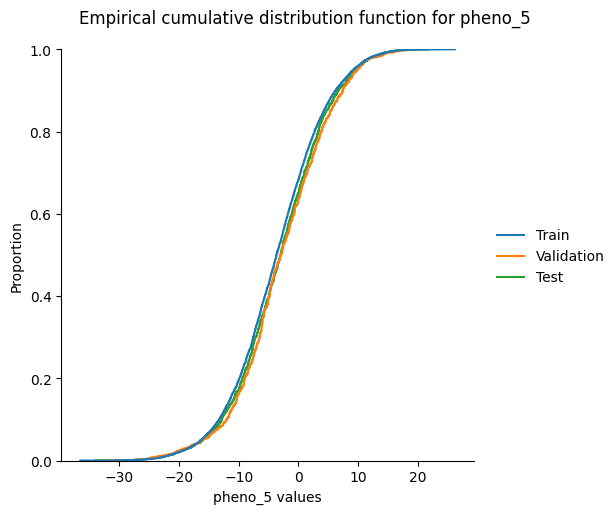

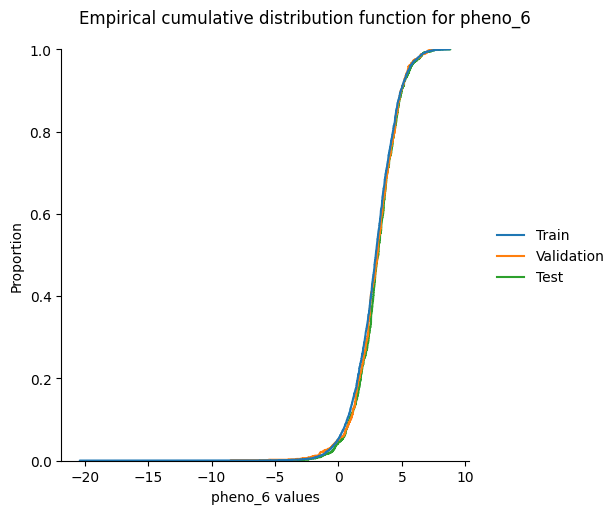

In [92]:
# Visual comparaison via ecdf plots comparaison for the three datasets
for pheno in train_dataset.phenotypes.keys():
    distribution_df = pd.DataFrame([train_phenotypes_df[pheno], validation_phenotypes_df[pheno], test_phenotypes_df[pheno]], index = ["Train", "Validation", "Test"]).transpose()
    plot = sns.displot(distribution_df, kind="ecdf")
    plot.set_xlabels(f"{pheno} values")

    plot.figure.subplots_adjust(top=0.9)
    plot.figure.suptitle(f"Empirical cumulative distribution function for {pheno}")
    plt.show()